<a href="https://colab.research.google.com/github/iveksl2/ds_skills/blob/statistical_inference_class/math_and_stats/Equivalence_Testing_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Equivalence Testing**

Be Careful Running Both pieces of code

In [ ]:
#Run the lines below to install and load the TOSTER package
#Install TOSTER package if needed.
# Lots of dependencies so best to run in R-Studio locally
if(!require(TOSTER)){install.packages('TOSTER')}
#Load TOSTER package
library(TOSTER)

#Question 2 and 3 (replace the zeroes with correct values)
# You can type ?TOSTtwo for help with the TOSTtwo function
TOSTtwo(m1 = 0.0, m2 = 0.0, sd1 = 0.0, sd2 = 0.0, n1 = 00, n2 = 00, low_eqbound_d = -0.0, high_eqbound_d = 0.0)

#Question 4 (replace the zeroes with correct values)
# You can type ?powerTOSTtwo for help with the powerTOSTtwo function
powerTOSTtwo(alpha = 0.00, N = 0, statistical_power = 0.0)

#Question 5 and 6 (replace the zeroes with correct values)
# You can type ?powerTOSTtwo for help with the powerTOSTtwo function
powerTOSTtwo(alpha = 0.00, statistical_power = 0.0, low_eqbound_d = -0.0, high_eqbound_d = 0.0)

#Question 7 (replace the zeroes with correct values)
# You can type ?TOSTmeta for help with the TOSTmeta function

TOSTmeta(alpha=0.00, ES=0.00, se=0.000, low_eqbound_d=-0.0, high_eqbound_d=0.0)

#Question 8 (replace the zeroes with correct values)
# You can type ?powerTOSTr for help with the powerTOSTr function
powerTOSTr(alpha=0.00, N=00, statistical_power=0.0)

#Question 9 (replace the zeroes with correct values)
# You can type ?TOSTr for help with the TOSTr function
TOSTr(alpha=0.00, n=00, r = 0.00, low_eqbound_r=-0.0, high_eqbound_r=0.0)


#Š Daniel Lakens, 2018. 
# This work is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License. https://creativecommons.org/licenses/by-nc-sa/4.0/

Loading required package: TOSTER

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘TOSTER’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘SparseM’, ‘sp’, ‘minqa’, ‘nloptr’, ‘zoo’, ‘qvcalc’, ‘relimp’, ‘elliptic’, ‘contfrac’, ‘deSolve’, ‘tmvnsim’, ‘caTools’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’, ‘estimability’, ‘xtable’, ‘lmtest’, ‘gnm’, ‘ca’, ‘plyr’, ‘reshape’, ‘coda’, ‘pbapply’, ‘gtools’, ‘MatrixModels’, ‘hypergeo’, ‘RcppEigen’, ‘mnormt’, ‘lmerTest’, ‘reshape2’, ‘pbivnorm’, ‘gplots’, ‘car’, ‘multcomp’, ‘PMCMR’, ‘emmeans’, ‘vcd’, ‘vcdExtra’, ‘GGally’, ‘BayesFactor’, ‘psych’, ‘GPArotation’, ‘afex’, ‘mvnormtest’, ‘lavaan’, ‘ggridges’, ‘ROCR’, ‘HDInterval’, ‘numDeriv’, ‘jmvcore’, ‘jmv’, ‘ggdist’, ‘distributional’, ‘cowplot’


Warning message in install.packages("TOSTER"

**Bayes Factor One-Sample T-test**

Streaming output truncated to the last 5000 lines.
Warning message in dt(sqrt(N) * obs, N - 1, sqrt(N) * delta):
“full precision may not have been achieved in 'pnt{final}'”
Warning message in dt(sqrt(N) * obs, N - 1, sqrt(N) * delta):
“full precision may not have been achieved in 'pnt{final}'”
Warning message in dt(sqrt(N) * obs, N - 1, sqrt(N) * delta):
“full precision may not have been achieved in 'pnt{final}'”
Warning message in dt(sqrt(N) * obs, N - 1, sqrt(N) * delta):
“full precision may not have been achieved in 'pnt{final}'”
Warning message in dt(sqrt(N) * obs, N - 1, sqrt(N) * delta):
“full precision may not have been achieved in 'pnt{final}'”
Warning message in dt(sqrt(N) * obs, N - 1, sqrt(N) * delta):
“full precision may not have been achieved in 'pnt{final}'”
Warning message in dt(sqrt(N) * obs, N - 1, sqrt(N) * delta):
“full precision may not have been achieved in 'pnt{final}'”
Warning message in dt(sqrt(N) * obs, N - 1, sqrt(N) * delta):
“full precision may not have been

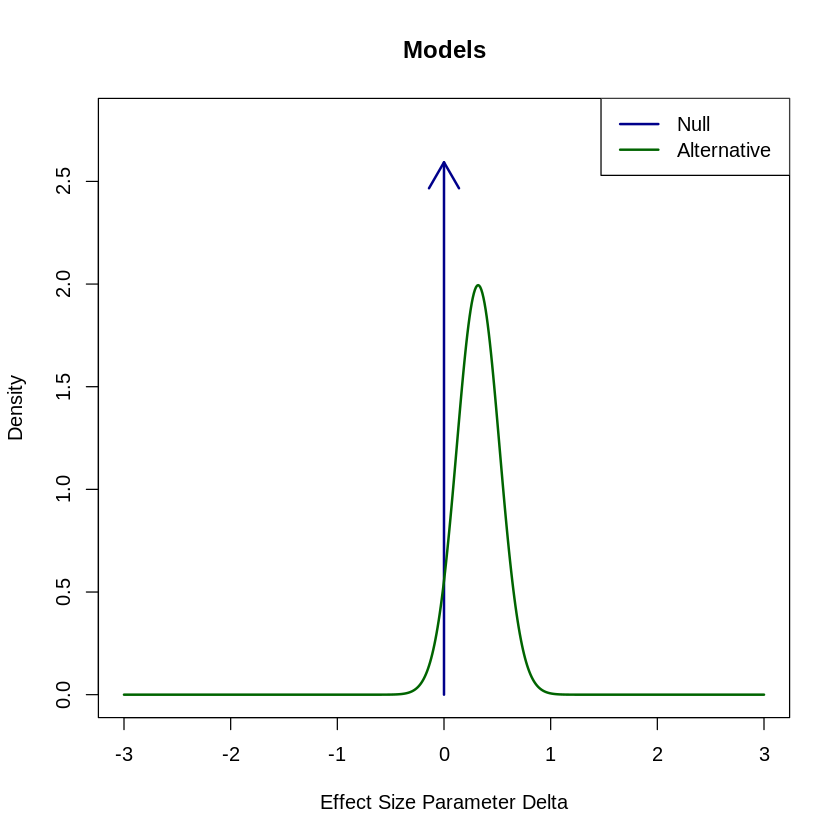

In [2]:
#This code is made by Jeff Rouder: http://jeffrouder.blogspot.nl/2016/01/what-priors-should-i-use-part-i.html
#This code is for a one-sided t-test, testing a difference against 0.

N <- 100 #Enter sample size
dz <- 0.25 #Enter Cohen's dz effect size observed in the dependent t-test or one-sided t-test

dz_prior <- 0.32 #Enter effect size dz for the prior 
sd_prior <- 0.2 #Enter sd of the effect sizes of the prior - the higher, the wider the prior is

lo <- -Inf #lower bound of support (e.g., set to 0 if effects < 0 is not possible)
hi <- Inf #upper bound of support

#specify prior
altDens=function(delta) 
  dnorm(delta,dz_prior,sd_prior)*as.integer(delta>lo)*as.integer(delta<hi)
#Normalize alternative density in case user does not, 
K=1/integrate(altDens,lower=lo,upper=hi)$value
f=function(delta) K*altDens(delta)

delta=seq(-3,3,.01)
#Plot Alternative as a density and Null as a point arrow
#png(file=paste('prior.png'),width=6000,height=4000, res = 1000)
maxAlt=max(f(delta))
plot(delta,f(delta),typ='n',xlab="Effect Size Parameter Delta",ylab="Density",ylim=c(0,1.4*maxAlt),main="Models")
arrows(0,0,0,1.3*maxAlt,col='darkblue',lwd=2)
lines(delta,f(delta),col='darkgreen',lwd=2)
legend("topright",legend=c("Null","Alternative"),col=c('darkblue','darkgreen'),lwd=2)
#dev.off()

#Prediction Function Under Null
nullPredF=function(obs,N) dt(sqrt(N)*obs,N-1)

#Prediction Function Under the Alternative
altPredIntegrand=function(delta,obs,N) 
  dt(sqrt(N)*obs,N-1,sqrt(N)*delta)*f(delta)
altPredF=function(obs,N) 
  integrate(altPredIntegrand,lower=lo,upper=hi,obs=obs,N=N)$value

obs=delta
I=length(obs)
nullPred=nullPredF(obs,N)
altPred=1:I
for (i in 1:I) altPred[i]=altPredF(obs[i],N)

#Evaluate Predicted Density at Observed Value dz
valNull=nullPredF(dz,N)
valAlt=altPredF(dz,N)

#Plot The Predictions
#png(file=paste('posterior.png'),width=6000,height=4000, res = 1000)
top=max(altPred,nullPred)
plot(type='l',obs,nullPred,ylim=c(0,top),xlab="Observed Effect Size",ylab="Density",main=paste("Bayes factor (alt/null) is ",round(valAlt/valNull,digits =3)),col='darkblue',lwd=2)
lines(obs,altPred,col='darkgreen',lwd=2)
legend("topright",legend=c("Null","Alternative"),col=c('darkblue','darkgreen'),lwd=2)
abline(v=dz,lty=2,lwd=2,col='red')
points(pch=19,c(dz,dz),c(valNull,valAlt))
#dev.off()

cat("Bayes factor (alt/null) is ",valAlt/valNull,", the t-value is ",sqrt(N)*dz," and the p-value is",2*(1-pt(abs(sqrt(N)*dz),N-1)))

#Š Daniel Lakens, 2016. 
# This work is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License. https://creativecommons.org/licenses/by-nc-sa/4.0/